Problem Statement 1) Plot Hist and Line graph for pH
level for quality 5 and quality 8.
Problem Statement 2) Which Quality of Wine is highly
Acidic?
Problem Statement 3) Quality Vs Total Acidity Bar and
Pie Chart?
Problem Statement 4) SO2 is considered to be harmful to
health. So which wine is more harmful to your health?
Provide Rank on the degree of harmfulness of wines and
plot a graph for SO2 vs Quality.
Problem Statement 5) Find the correlation between the
residual sugar vs total sulphur dioxide .plot three scatter
plots for a quality range (3,4),(5,6),(7,8).
Fact: sweet white wine typicaslly contain the most
sulphites, as more as added to the fermentation
process.another reason why a night on the white might
Make the hangover worse usual.
Analysis: relation is directly proportional. Some medium
and low-quality wines have a high amount of both the
contents.
Problem Statement 6) Find the correlation between pH
and Quality.
Fact: winemaker use ph as a way to measure ripeness in
relation to acidity. Low ph wine will taste tart and crips,
while higher ph wines are more susceptible to bacterial
growth.most wine pHs fall 3 or 4;about 3.0 to 3.4 is
desirable for white wines; while about 3.3 to 3.6 is best for
reds.
Expected Analysis: Higher Quality wine should contain
ph between 3.3 to 3.4
Problem Statement 7) pH vs residual sugar
The perfect way to contextualize how sweetness reduces
the sensation of acidity in wine is to compare how you
react to testing a raw lemon and coke technically, they
have the same pH (around 2.5),but since coke is sweet it's
not as intense.
Expected Analysis: Should have indicated proportion.

In [109]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
%matplotlib inline
matplotlib.style.use('ggplot')

In [110]:
wine=pd.read_csv('winequality-red (1).csv',sep=';')

In [111]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [8]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [59]:
wine.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [9]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [17]:
q5=wine['pH'][wine['quality']==5]

In [15]:
q8=wine['pH'][wine['quality']==8]

In [12]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [18]:
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Problem Statement 1) Plot Hist and Line graph for pH level for quality 5 and quality 8.

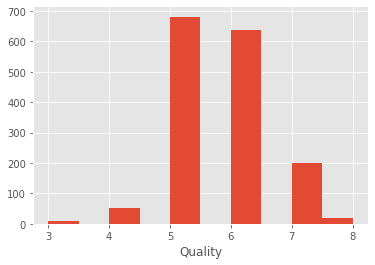

In [60]:
wine['quality'].hist()
plt.xlabel('Quality')
plt.show()

1.a):-- Histogram graph for quality 5

In [32]:
q5=wine['pH'][wine['quality']==5]

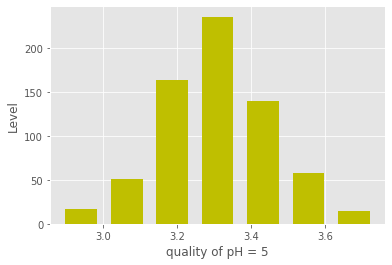

In [94]:
plt.hist(q5,bins=7,rwidth=0.7,color='y')
plt.xlabel('quality of pH = 5')
plt.ylabel('Level')
plt.show()

1.a):-- Histogram graph for quality 8

In [45]:
q8=wine['pH'][wine['quality']==8]

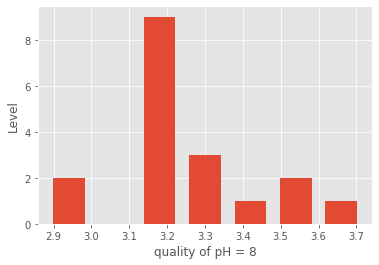

In [44]:
plt.hist(q8,bins=7,rwidth=0.7)
plt.xlabel('quality of pH = 8')
plt.ylabel('Level')
plt.show()

1.b):-- Line graph for quality 5

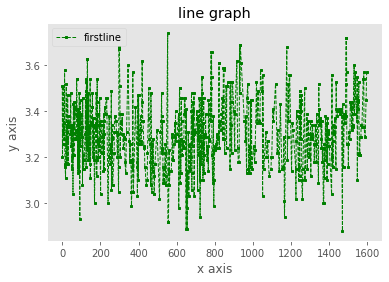

In [50]:
plt.plot(q5,color='g',marker='s',markersize=2,label='firstline',linestyle='--',linewidth=1)
plt.title('line graph')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.grid()
plt.legend()
plt.show()

1.b):-- Line graph for quality 8

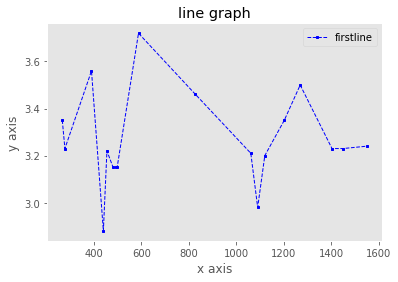

In [49]:
plt.plot(q8,color='b',marker='s',markersize=2,label='firstline',linestyle='--',linewidth=1)
plt.title('line graph')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.grid()
plt.legend()
plt.show()

### Problem Statement 2) Which Quality of Wine is highly Acidic?

In [85]:
x=wine['quality']
y=wine['fixed acidity']

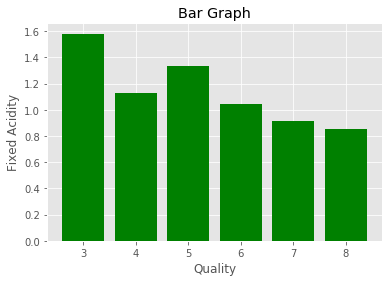

In [96]:
plt.bar(x,y,data=wine,color='g')
plt.title('Bar Graph')
plt.xlabel('Quality')
plt.ylabel('Fixed Acidity')
plt.show()

In [89]:
x=wine['quality']
y=wine['volatile acidity']

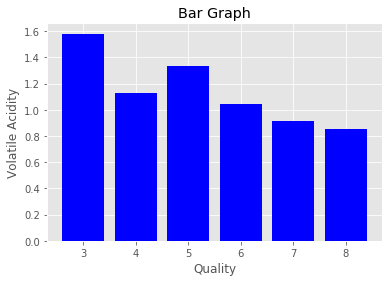

In [93]:
plt.bar(x,y,data=wine,color='b')
plt.title('Bar Graph')
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity')
plt.show()

### Problem Statement 3) Quality Vs Total Acidity Bar and Pie Chart

In [61]:
x1=wine['quality']
y1=wine['fixed acidity']+wine['volatile acidity']

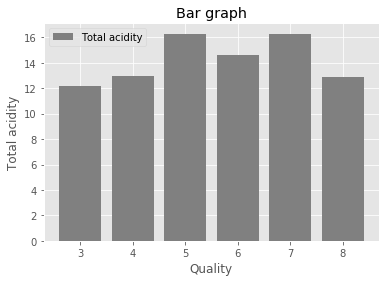

In [98]:
plt.xlabel('Quality')
plt.ylabel('Total acidity')
plt.title('Bar graph')
plt.bar(x1,y1,label='Total acidity',color='grey')
plt.legend()
plt.show()

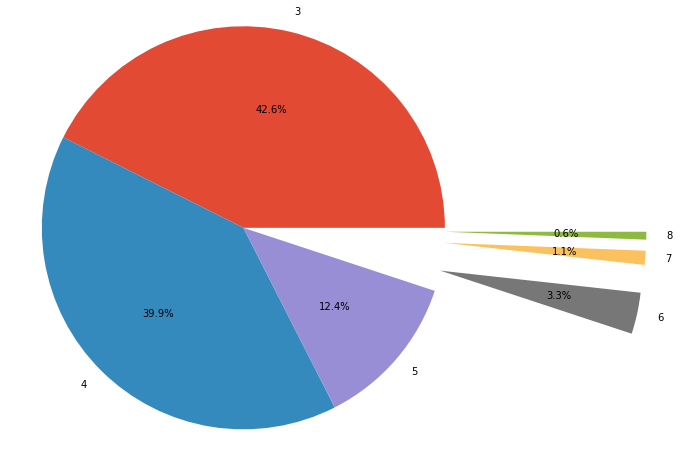

In [75]:
plt.figure(figsize=(12,8))
explode=[0,0,0,1,1,1]
plt.pie(wine['quality'].value_counts(),labels=list('345678'),explode=explode,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

### Problem Statement 4) SO2 is considered to be harmful to health. So which wine is more harmful to your health? Provide Rank on the degree of harmfulness of wines and plot a graph for SO2 vs Quality. 

In [126]:
x=wine['quality']
data=wine['total sulfur dioxide'].rank(method='max',ascending=False)
wine['data']=data

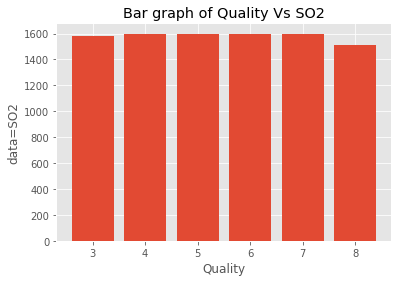

In [129]:
plt.bar(x,data,data=wine)
plt.xlabel('Quality')
plt.ylabel('data=SO2')
plt.title('Bar graph of Quality Vs SO2')
plt.show()

### Problem Statement 5) Find the correlation between the residual sugar vs total sulphur dioxide .plot three scatter plots for a quality range (3,4),(5,6),(7,8). Fact: sweet white wine typicaslly contain the most sulphites, as more as added to the fermentation process.another reason why a night on the white might Make the hangover worse usual. Analysis: relation is directly proportional. Some medium and low-quality wines have a high amount of both the contents.

In [133]:
info=wine[['total sulfur dioxide','residual sugar']]


In [135]:
corr=info.corr()
corr

,total sulfur dioxide,residual sugar
total sulfur dioxide,1.000000,0.203028
residual sugar,0.203028,1.000000


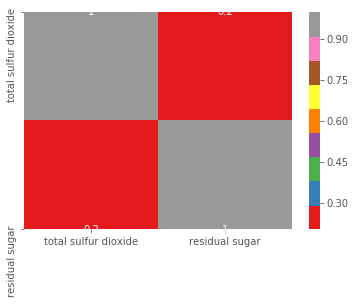

In [141]:
sns.heatmap(corr,annot=True,cmap='Set1')
plt.show()

### Problem Statement 6) Find the correlation between pH and Quality.

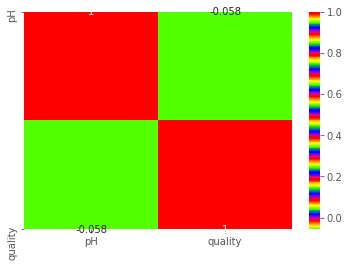

In [147]:
data=wine[['pH','quality']]
corr=data.corr()
sns.heatmap(corr,annot=True,cmap='prism_r')
plt.show()

### Problem Statement 7):-- pH vs residual sugar

In [149]:
x=wine['pH']
y=wine['residual sugar']

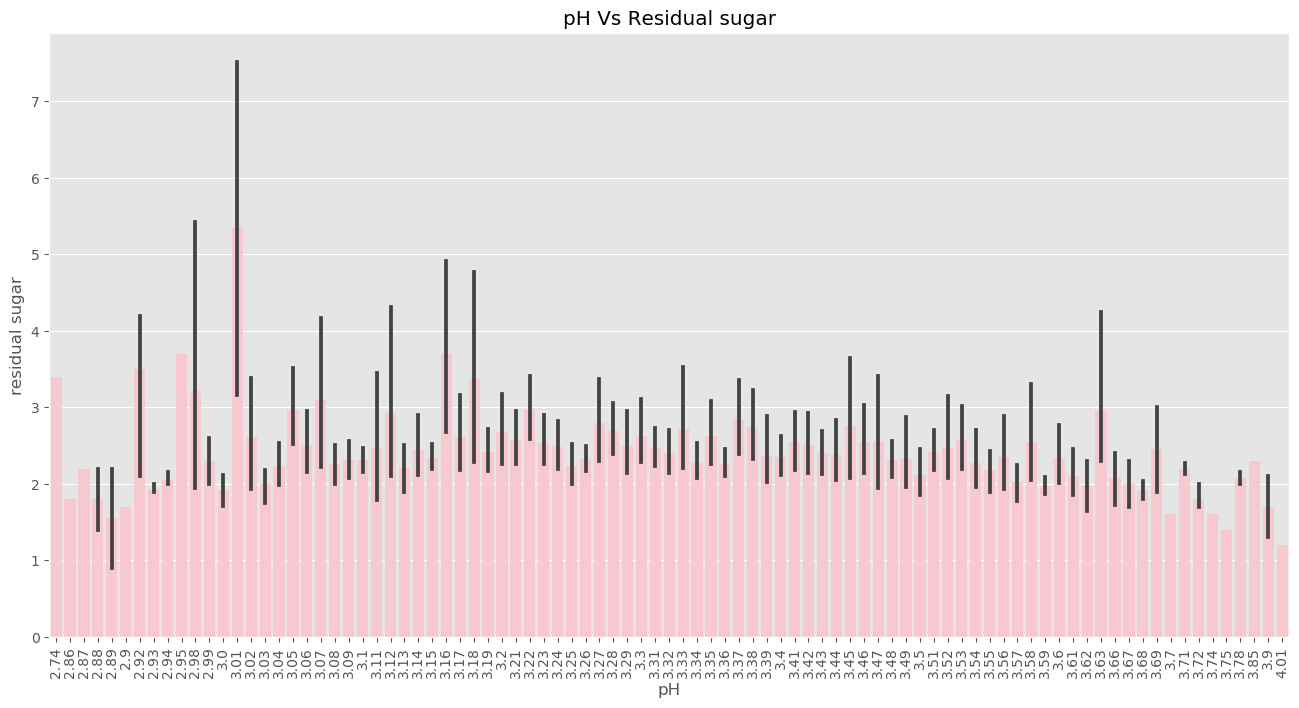

In [165]:
plt.figure(figsize=(16,8),dpi=100)
sns.barplot(x,y,data=wine,color='pink')
plt.xticks(rotation=90)
plt.title('pH Vs Residual sugar')
plt.show()